In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
username = "root"
password = "password"
host = "localhost"
database = "webscrap"

engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}/{database}")

data = pd.read_sql("SELECT * FROM tv_dataset", con=engine)
df=data[['name','Rating','size_cm','size_inch','display','edition','model_id','sound_output','warranty_years','rating_count','review_count','Deal_Type','Offers','Price']]
df.shape

(611, 14)

In [3]:
df.tail()

,name,Rating,size_cm,size_inch,display,edition,model_id,sound_output,warranty_years,rating_count,review_count,Deal_Type,Offers,Price
606,Haier,4.5,138,55.0,OLED,90,H55C90EUX,55,0,12,4,Bank Offer,50,105000
607,LG,4.5,109,43.0,LED,109,43UQ7300PTA,43,2,3172,381,Top Discount of the Sale,43,30317
608,Samsung,4.7,80,32.0,LED,80,UA32T4390AKXXL,32,1,6,1,Bank Offer,9,18550
609,Haier,3.0,165,65.0,OLED,90,H65C90EUX,65,0,8,1,Upto 14650 Off on Exchange,44,169990
610,Asiano,4.7,80,32.0,LED,32,ASI32PCVR,32,0,3,1,Bank Offer,38,8337


In [4]:
df.columns

Index(['name', 'Rating', 'size_cm', 'size_inch', 'display', 'edition',
       'model_id', 'sound_output', 'warranty_years', 'rating_count',
       'review_count', 'Deal_Type', 'Offers', 'Price'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            611 non-null    object 
 1   Rating          611 non-null    float64
 2   size_cm         611 non-null    int64  
 3   size_inch       611 non-null    float64
 4   display         611 non-null    object 
 5   edition         611 non-null    int64  
 6   model_id        611 non-null    object 
 7   sound_output    611 non-null    int64  
 8   warranty_years  611 non-null    int64  
 9   rating_count    611 non-null    int64  
 10  review_count    611 non-null    int64  
 11  Deal_Type       611 non-null    object 
 12  Offers          611 non-null    int64  
 13  Price           611 non-null    int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 67.0+ KB


In [6]:
df[["Rating","Price","Offers","size_cm","size_inch","sound_output","warranty_years","review_count","review_count"]].describe().round()

,Rating,Price,Offers,size_cm,size_inch,sound_output,warranty_years,review_count,review_count
count,611.0,611.0,611.0,611.0,611.0,611.0,611.0,611.0,611.0
mean,4.0,52554.0,48.0,126.0,51.0,56.0,1.0,1152.0,1152.0
std,0.0,55838.0,12.0,38.0,14.0,48.0,1.0,2458.0,2458.0
min,2.0,4990.0,9.0,1.0,24.0,1.0,0.0,0.0,0.0
25%,4.0,16999.0,41.0,108.0,43.0,43.0,0.0,9.0,9.0
50%,4.0,31999.0,47.0,127.0,55.0,55.0,1.0,229.0,229.0
75%,4.0,61400.0,57.0,140.0,62.0,65.0,1.0,1134.0,1134.0
max,5.0,458266.0,79.0,253.0,100.0,825.0,3.0,21889.0,21889.0


In [7]:
df.isnull().sum()

name              0
Rating            0
size_cm           0
size_inch         0
display           0
edition           0
model_id          0
sound_output      0
warranty_years    0
rating_count      0
review_count      0
Deal_Type         0
Offers            0
Price             0
dtype: int64

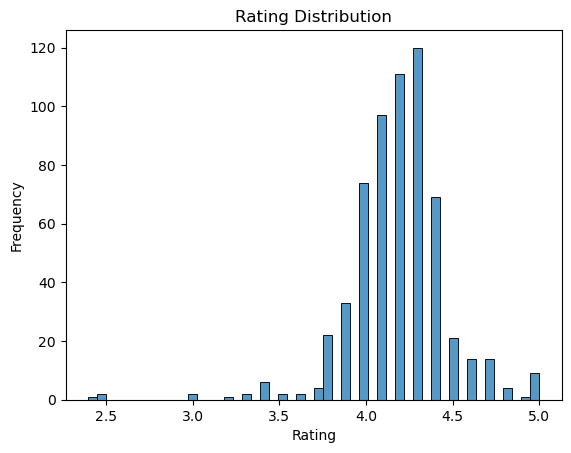

In [8]:
sns.histplot(df['Rating'])
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

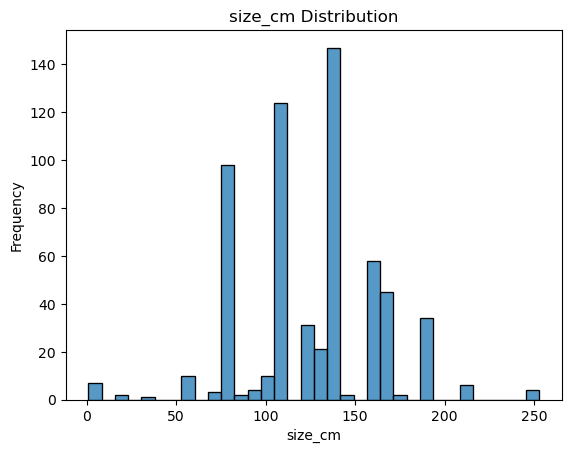

In [9]:
sns.histplot(df['size_cm'])
plt.title('size_cm Distribution')
plt.xlabel('size_cm')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

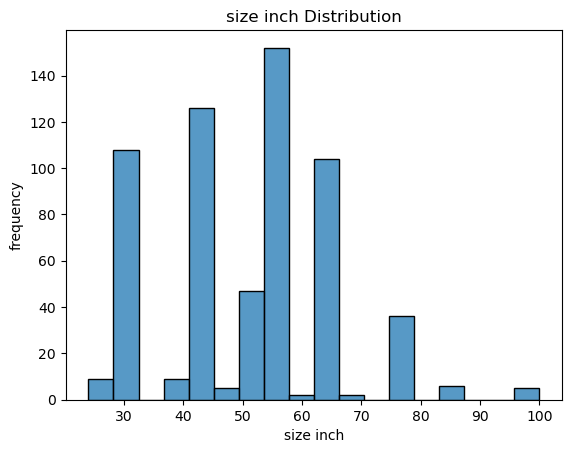

In [10]:
sns.histplot(df['size_inch'])
plt.title('size inch Distribution')
plt.xlabel('size inch')
plt.ylabel('frequency')
plt.grid(False)
plt.show()

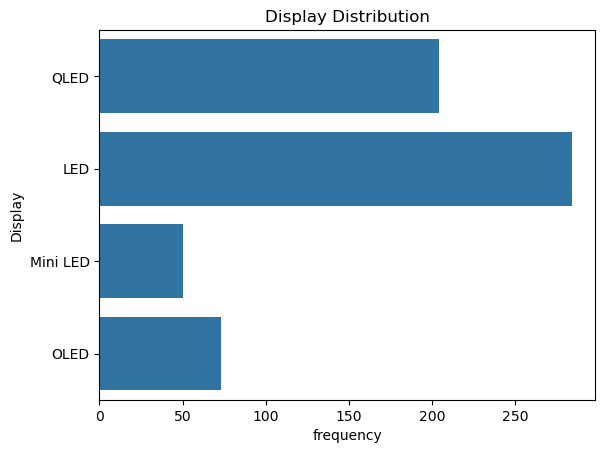

In [11]:
sns.countplot(df['display'])
plt.title('Display Distribution')
plt.xlabel('frequency')
plt.ylabel('Display')
plt.grid(False)
plt.show()

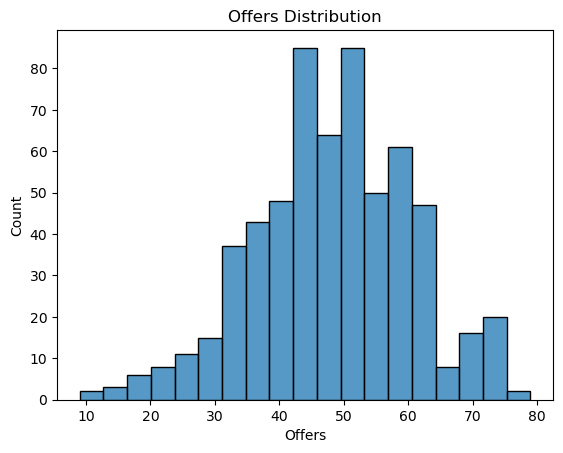

In [12]:
sns.histplot(df['Offers'])
plt.title('Offers Distribution')
plt.xlabel('Offers')
plt.ylabel('Count')
plt.grid(False)
plt.show()

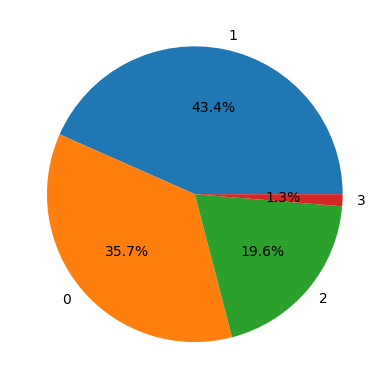

In [13]:
x = data['warranty_years'].value_counts()
plt.pie(x.values,labels=x.index,autopct='%1.1f%%')
plt.show()

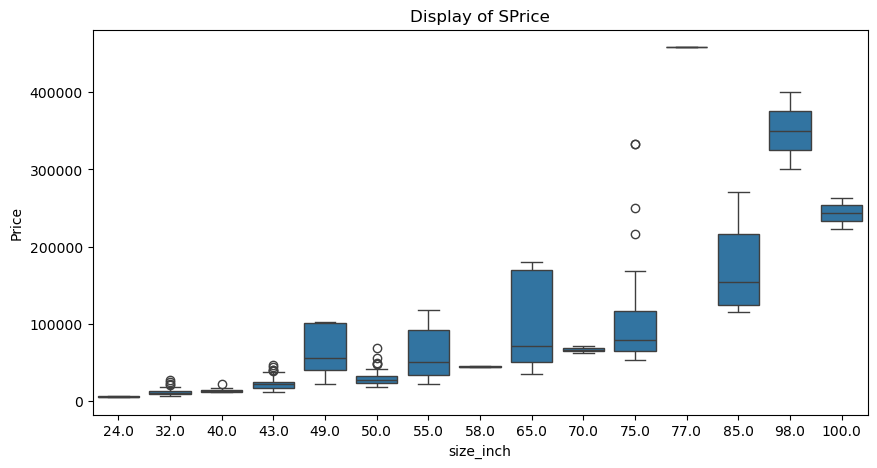

In [14]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['size_inch'], y=df['Price'])
plt.title('Display of SPrice')
plt.grid(False)
plt.show()

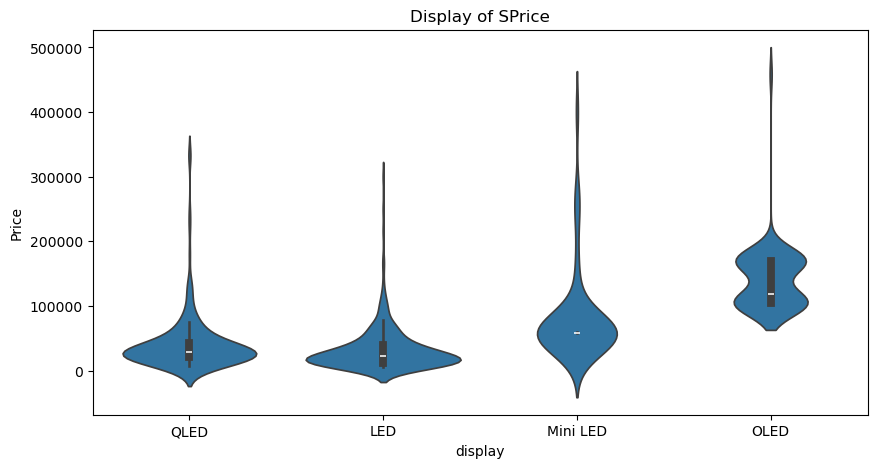

In [15]:
plt.figure(figsize=(10, 5))
sns.violinplot(x=df['display'], y=df['Price'])
plt.title('Display of SPrice')
plt.grid(False)
plt.show()

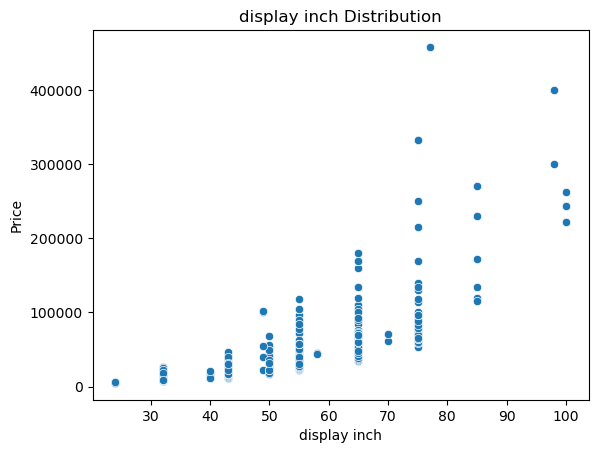

In [16]:
sns.scatterplot(x=df['size_inch'], y=df['Price'])
plt.title('display inch Distribution')
plt.xlabel('display inch')
plt.ylabel('Price')
plt.grid(False)
plt.show()

<Axes: >

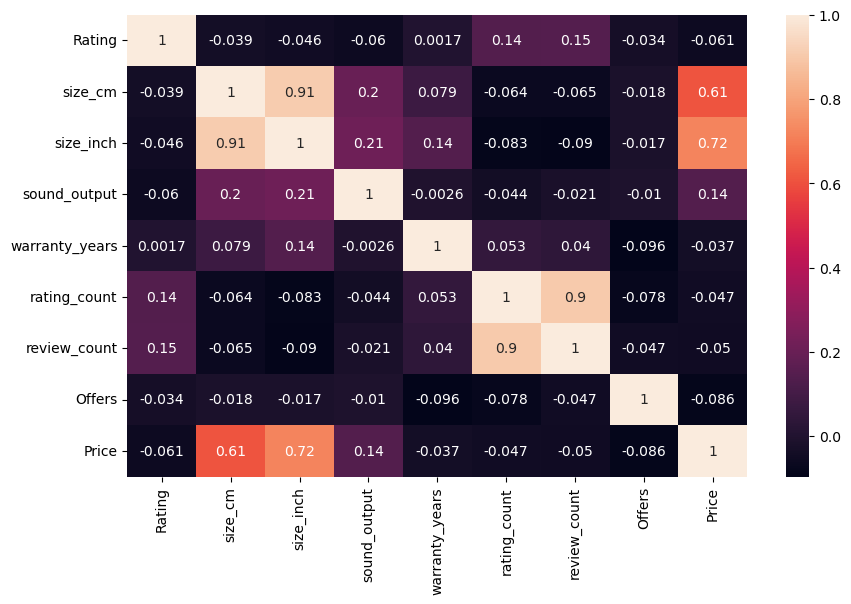

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['Rating','size_cm','size_inch', 'sound_output', 'warranty_years', 'rating_count','review_count', 'Offers', 'Price']].corr(), annot=True)

In [18]:
price_data = df[['Price']]   # Price column as DataFrame

In [19]:
scaler = StandardScaler()
price_scaled = scaler.fit_transform(price_data)

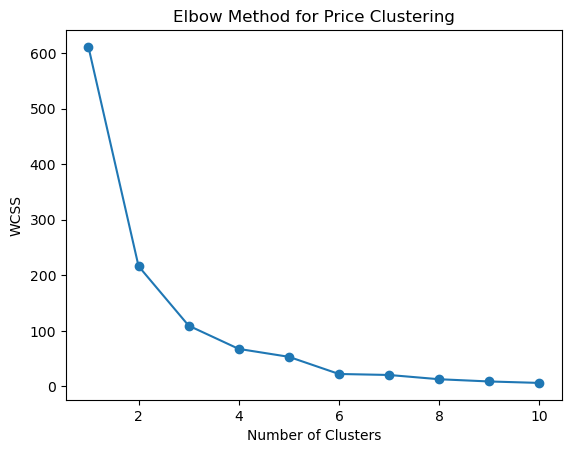

In [ ]:
wcss = [] 

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(price_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Price Clustering")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()
import warnings
warnings.filterwarnings("ignore")

In [35]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Price_Cluster'] = kmeans.fit_predict(price_scaled)

In [36]:
df.groupby('Price_Cluster')['Price'].describe().round()

,count,mean,std,min,25%,50%,75%,max
Price_Cluster,,,,,,,,
0,150.0,80996.0,22715.0,52999.0,57990.0,72562.0,105000.0,134999.0
1,52.0,197890.0,63490.0,139990.0,169990.0,169990.0,174392.0,458266.0
2,409.0,23645.0,11912.0,4990.0,12999.0,22990.0,31999.0,51990.0


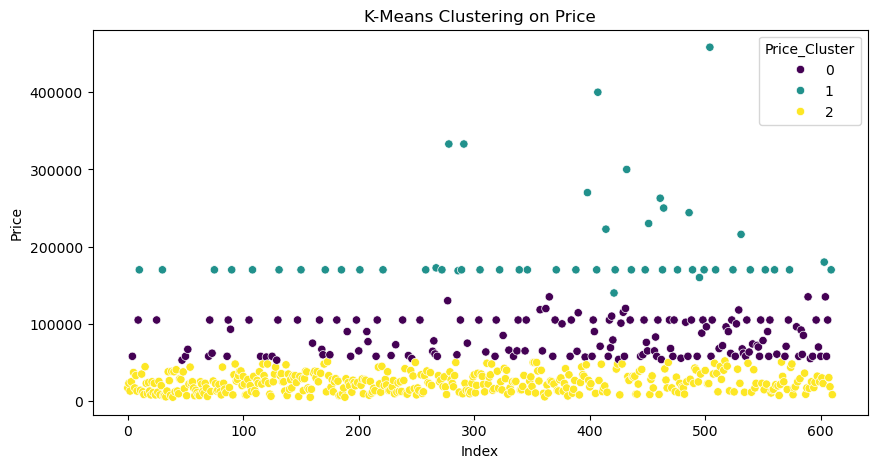

In [37]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df.index, y=df['Price'], hue=df['Price_Cluster'], palette='viridis')
plt.title('K-Means Clustering on Price')
plt.xlabel('Index')
plt.ylabel('Price')
plt.show()

## 0 low price, 1 high price, 2 medium price

In [25]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [26]:
le = LabelEncoder()

cat_cols = df.select_dtypes(include=['object']).columns
cat_cols
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            611 non-null    int64  
 1   Rating          611 non-null    float64
 2   size_cm         611 non-null    int64  
 3   size_inch       611 non-null    float64
 4   display         611 non-null    int64  
 5   edition         611 non-null    int64  
 6   model_id        611 non-null    int64  
 7   sound_output    611 non-null    int64  
 8   warranty_years  611 non-null    int64  
 9   rating_count    611 non-null    int64  
 10  review_count    611 non-null    int64  
 11  Deal_Type       611 non-null    int64  
 12  Offers          611 non-null    int64  
 13  Price           611 non-null    int64  
 14  Price_Cluster   611 non-null    int32  
dtypes: float64(2), int32(1), int64(12)
memory usage: 69.3 KB


In [27]:
df["Price_Cluster"].value_counts()

Price_Cluster
2    409
0    150
1     52
Name: count, dtype: int64

In [60]:
df.columns

Index(['name', 'Rating', 'size_cm', 'size_inch', 'display', 'edition',
       'model_id', 'sound_output', 'warranty_years', 'rating_count',
       'review_count', 'Deal_Type', 'Offers', 'Price', 'Price_Cluster'],
      dtype='object')

In [62]:
X = df.drop(df[['name','edition','model_id','Deal_Type','Price_Cluster']], axis=1)
y = df['Price_Cluster'] 

In [63]:
from imblearn.over_sampling import SMOTE

In [64]:
# 1. Train-test split before scaling and smote
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [65]:
# 2. Standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [66]:
# 3. SMOTE ONLY on training set
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

In [67]:
y_train_res.value_counts()

Price_Cluster
2    327
0    327
1    327
Name: count, dtype: int64

* Logistic Regression cannot learn the shape
* It tries to draw a straight line where a curved boundary is needed
* So it collapses and predicts only the majority class (class 2)

In [68]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)
y_pred = log_model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:", classification_report(y_test, y_pred))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))

Accuracy: 0.22764227642276422
Classification Report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.02      0.09      0.03        11
           2       0.41      0.33      0.36        82

    accuracy                           0.23       123
   macro avg       0.14      0.14      0.13       123
weighted avg       0.27      0.23      0.25       123

Confusion Matrix: [[ 0  1 29]
 [ 0  1 10]
 [ 2 53 27]]


* But your dataset has 3 classes 0, 1, 2
* Overlapping clusters

In [69]:
scv=SVC()
scv.fit(X_train,y_train)
y_pred = scv.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.00      0.00      0.00        11
           2       0.67      1.00      0.80        82

    accuracy                           0.67       123
   macro avg       0.22      0.33      0.27       123
weighted avg       0.44      0.67      0.53       123

[[ 0  0 30]
 [ 0  0 11]
 [ 0  0 82]]


* Class 0, 1, 2 form clusters in feature space KNN likes clustered data
* It simply checks: “What class do the nearest neighbors belong to?”
* This works very well, especially for:
* Numerical features (size_cm, size_inch, sound_output, etc.)
* Balanced data (SMOTE created equal class size)

In [70]:
knn=KNeighborsClassifier()
knn.fit(X_train_res, y_train_res)

y_pred = knn.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9105691056910569
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        30
           1       0.92      1.00      0.96        11
           2       0.96      0.90      0.93        82

    accuracy                           0.91       123
   macro avg       0.89      0.93      0.91       123
weighted avg       0.92      0.91      0.91       123

[[27  0  3]
 [ 0 11  0]
 [ 7  1 74]]


* Random Forest builds hundreds of decision trees, each splitting features in complex ways.
* It can learn ANY shape

In [71]:
ran=RandomForestClassifier()
ran.fit(X_train_res, y_train_res)

y_pred = ran.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:", classification_report(y_test, y_pred))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))

Accuracy: 0.991869918699187
Classification Report:               precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.91      0.95        11
           2       1.00      1.00      1.00        82

    accuracy                           0.99       123
   macro avg       0.99      0.97      0.98       123
weighted avg       0.99      0.99      0.99       123

Confusion Matrix: [[30  0  0]
 [ 1 10  0]
 [ 0  0 82]]


* XGBoost predicted ONLY class 2 for all samples.
* Completely failed to identify class 0 and class 1.

In [72]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:", classification_report(y_test, y_pred))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))

Accuracy: 0.6666666666666666
Classification Report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.00      0.00      0.00        11
           2       0.67      1.00      0.80        82

    accuracy                           0.67       123
   macro avg       0.22      0.33      0.27       123
weighted avg       0.44      0.67      0.53       123

Confusion Matrix: [[ 0  0 30]
 [ 0  0 11]
 [ 0  0 82]]


In [73]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(random_state=42)

grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train_res, y_train_res)

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Score: 1.0


In [75]:
df.columns

Index(['name', 'Rating', 'size_cm', 'size_inch', 'display', 'edition',
       'model_id', 'sound_output', 'warranty_years', 'rating_count',
       'review_count', 'Deal_Type', 'Offers', 'Price', 'Price_Cluster'],
      dtype='object')

In [84]:
df

,name,Rating,size_cm,size_inch,display,edition,model_id,sound_output,warranty_years,rating_count,review_count,Deal_Type,Offers,Price,Price_Cluster
0,9,4.1,109,43.0,3,109,84,43,0,7265,1652,11,62,16999,2
1,9,4.1,127,50.0,3,127,126,50,0,7265,1652,0,73,22999,2
2,40,4.3,80,32.0,0,80,418,32,2,124643,7448,15,27,12990,2
3,50,4.0,108,43.0,3,108,350,43,0,12783,720,7,44,24999,2
4,10,4.2,139,55.0,1,80,311,55,0,11,2,11,47,57970,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,10,4.5,138,55.0,2,90,310,55,0,12,4,0,50,105000,0
607,20,4.5,109,43.0,0,109,112,43,2,3172,381,7,43,30317,2
608,40,4.7,80,32.0,0,80,420,32,1,6,1,0,9,18550,2
609,10,3.0,165,65.0,2,90,312,65,0,8,1,9,44,169990,1


In [90]:
data_new=[[4.1, 109, 43.0, 3,43,0,7265,1652,63,16999]]
print(ran.predict(data_new))

[1]
